In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('BIP_numerical_NA.csv')

In [3]:
data['PlayResult'].describe() 

count    3813.000000
mean        0.472069
std         0.499285
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: PlayResult, dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 54 columns):
Unnamed: 0             3813 non-null int64
PitchNo                3813 non-null int64
PAofInning             3813 non-null int64
PitchofPA              3813 non-null int64
PitcherId              3813 non-null float64
PitcherThrows          3813 non-null int64
BatterId               3813 non-null float64
BatterSide             3813 non-null int64
Inning                 3813 non-null int64
Outs                   3813 non-null int64
Balls                  3813 non-null int64
Strikes                3813 non-null int64
OutsOnPlay             3813 non-null int64
RunsScored             3813 non-null int64
RelSpeed               3813 non-null float64
VertRelAngle           3813 non-null float64
HorzRelAngle           3813 non-null float64
SpinRate               3813 non-null float64
SpinAxis               3813 non-null float64
RelHeight              3813 non-null float64
RelSide          

In [5]:
data['Bearing'].describe() # delete values outside of -45 to 45

count    3813.000000
mean        0.120568
std        24.569480
min       -62.861782
25%       -19.518035
50%         0.380027
75%        19.721306
max        58.995161
Name: Bearing, dtype: float64

In [6]:
data = data[data['Bearing'].abs()<=45]

In [7]:
data['Bearing'].describe() 

count    3742.000000
mean       -0.088625
std        23.836941
min       -44.993161
25%       -19.196951
50%         0.293265
75%        19.145796
max        44.941170
Name: Bearing, dtype: float64

In [8]:
data['3B'] = 0
data['5_6_Hole'] = 0
data['SS'] = 0
data['Up_the_Middle'] = 0
data['2B'] = 0
data['3_4_Hole'] = 0
data['1B'] = 0

In [9]:
data.head()

,Unnamed: 0,PitchNo,PAofInning,PitchofPA,PitcherId,PitcherThrows,BatterId,BatterSide,Inning,Outs,...,ay0,az0,PlayResult,3B,5_6_Hole,SS,Up_the_Middle,2B,3_4_Hole,1B
0,30,31,4,4,8886490.0,1,8889935.0,1,1,1,...,22.608287,-29.020022,1,0,0,0,0,0,0,0
1,52,53,3,1,8889942.0,1,8886477.0,0,2,1,...,27.363407,-25.421615,1,0,0,0,0,0,0,0
2,62,63,1,1,8886490.0,1,8889937.0,0,2,1,...,31.937280,-18.947060,0,0,0,0,0,0,0,0
3,92,93,7,2,8889947.0,1,8886477.0,0,3,2,...,31.294218,-12.580120,1,0,0,0,0,0,0,0
4,127,128,4,3,8889947.0,1,8881734.0,1,4,2,...,25.060342,-31.168783,0,0,0,0,0,0,0,0


In [10]:
data.loc[((data['Bearing'] > -45) & (data['Bearing'] < -33.75)), '3B'] = 1

In [11]:
data.loc[((data['Bearing'] > -33.75) & (data['Bearing'] < -22.5)), '5_6_Hole'] = 1

In [12]:
data.loc[((data['Bearing'] > -22.5) & (data['Bearing'] < -11.25)), 'SS'] = 1

In [13]:
data.loc[((data['Bearing'] > -11.25) & (data['Bearing'] < 11.25)), 'Up_the_Middle'] = 1

In [14]:
data.loc[((data['Bearing'] > 11.25) & (data['Bearing'] < 22.5)), '2B'] = 1

In [15]:
data.loc[((data['Bearing'] > 22.5) & (data['Bearing'] < 33.75)), '3_4_Hole'] = 1

In [16]:
data.loc[((data['Bearing'] > 33.75) & (data['Bearing'] < 45)), '1B'] = 1

In [17]:
data.head()

,Unnamed: 0,PitchNo,PAofInning,PitchofPA,PitcherId,PitcherThrows,BatterId,BatterSide,Inning,Outs,...,ay0,az0,PlayResult,3B,5_6_Hole,SS,Up_the_Middle,2B,3_4_Hole,1B
0,30,31,4,4,8886490.0,1,8889935.0,1,1,1,...,22.608287,-29.020022,1,0,1,0,0,0,0,0
1,52,53,3,1,8889942.0,1,8886477.0,0,2,1,...,27.363407,-25.421615,1,0,0,0,0,0,1,0
2,62,63,1,1,8886490.0,1,8889937.0,0,2,1,...,31.937280,-18.947060,0,0,0,0,1,0,0,0
3,92,93,7,2,8889947.0,1,8886477.0,0,3,2,...,31.294218,-12.580120,1,0,0,0,0,1,0,0
4,127,128,4,3,8889947.0,1,8881734.0,1,4,2,...,25.060342,-31.168783,0,0,0,0,1,0,0,0


In [18]:
data = data.loc[:, data.columns != "Unnamed: 0"]

In [19]:
play_result = data['PlayResult']

In [20]:
data = data.loc[:, data.columns != "PlayResult"]

In [21]:
data['PlayResult'] = play_result

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3742 entries, 0 to 3812
Data columns (total 60 columns):
PitchNo                3742 non-null int64
PAofInning             3742 non-null int64
PitchofPA              3742 non-null int64
PitcherId              3742 non-null float64
PitcherThrows          3742 non-null int64
BatterId               3742 non-null float64
BatterSide             3742 non-null int64
Inning                 3742 non-null int64
Outs                   3742 non-null int64
Balls                  3742 non-null int64
Strikes                3742 non-null int64
OutsOnPlay             3742 non-null int64
RunsScored             3742 non-null int64
RelSpeed               3742 non-null float64
VertRelAngle           3742 non-null float64
HorzRelAngle           3742 non-null float64
SpinRate               3742 non-null float64
SpinAxis               3742 non-null float64
RelHeight              3742 non-null float64
RelSide                3742 non-null float64
Extension      

In [23]:
data.to_csv('data_strategic_bearing.csv')

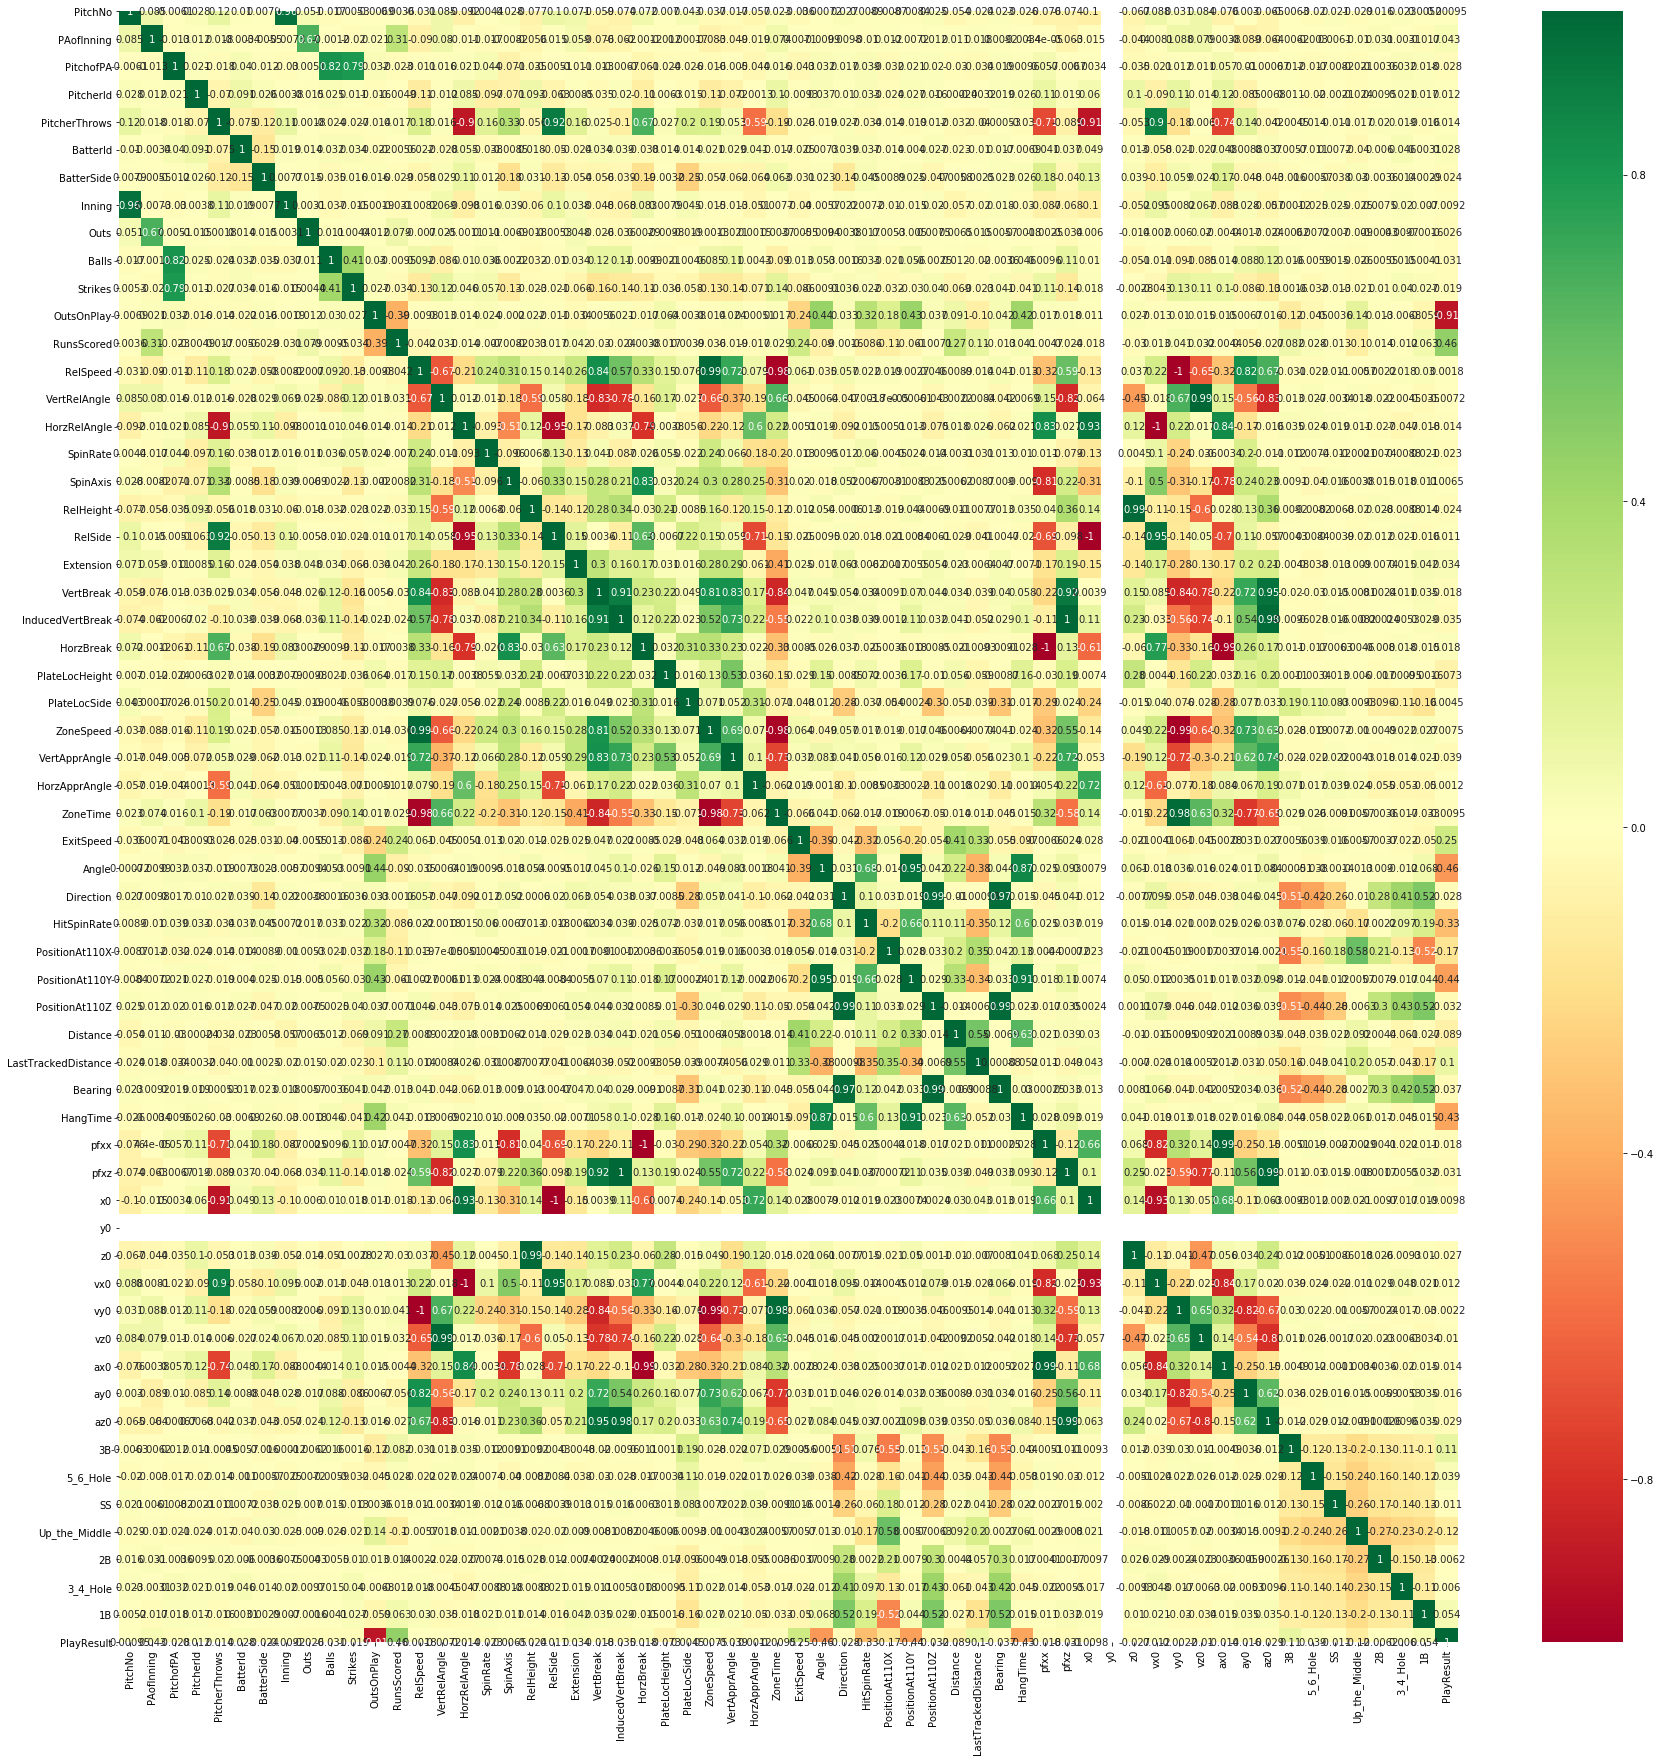

In [24]:
corrmat = data.corr()
top_corr_features = corrmat.index
play_result = corrmat.index[-1]
plt.figure(figsize = (30,30))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
corr = data[top_corr_features].corr()

In [26]:
corr.to_csv('corr_strategic.csv')